<a href="https://colab.research.google.com/github/sambencoding/Data-Science-Assignments/blob/main/Unit_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [2]:
#We'll also need to re-import this library after we reinstall it

import preliz as pz

In [3]:
#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

###**Free Throws**

Christiano Ronoldo is a world renowned soccer player that now plays at Al Nassr in Saudi Arabia. The 23/24 season hasn't started yet so we are going to try to predict how well he will shoot the penalties.

There is a lot of hatred on Ronaldo because people always think his goals are only from penalties, we will see if he is atleast good in taking them.

A metric that we can use to evaluate a player's efficiency in converting penalty kicks into goals. This metric can be referred to as Penalty Kick Conversion Rate or PKCR. IN Soccer, players are awarded a penalty kick when fouled in the penalty box. All penalties are tooken from the same spot, the penalty spot, and players either miss or make the shot. Made penalties are awared a goal, and missed penalties are awarded nothing.

###**Modeling Penalties Prior Information**

The overall average Penalty Kick Conversion rate is 75%. Ronaldo is the main penalty kicker for his team so I excpect he will take around 10-12 penalties during the season. I think Ronaldo's PKCR will be around 83% so he will score 10/12 penalties that he takes.

<Axes: >

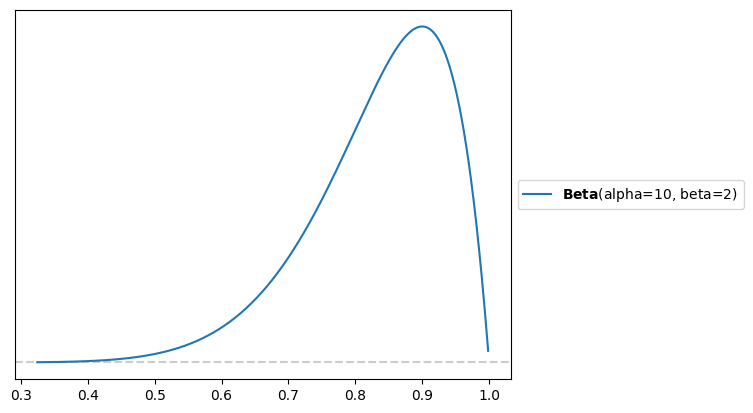

In [6]:
#plotting the beta distribution with shape parameter 10 and scale parameter 2
pz.Beta(alpha=10,beta=2).plot_pdf()

In [10]:

PKCR_prior = pz.Beta(alpha=10,beta=2)

PKCR_prior_mode = (FT_prior.alpha - 1)/(FT_prior.alpha + FT_prior.beta - 2)

PKCR_prior.mean(), FT_prior.median(), FT_prior_mode

(0.8333333333333334, 0.8520365748358262, 0.9)

<Axes: >

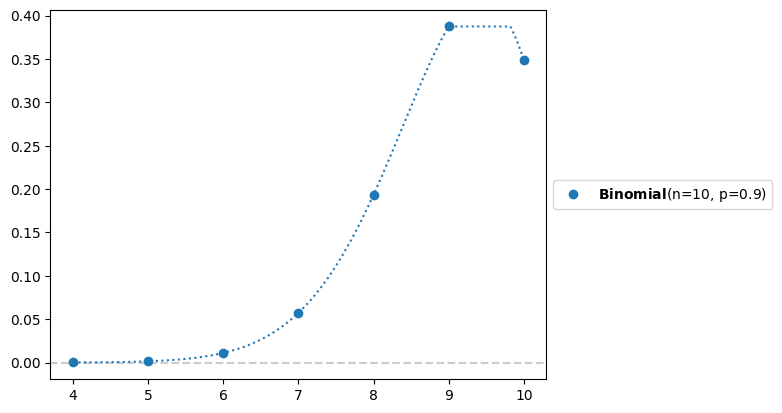

In [8]:
#
pz.Binomial(n = 10, p = 9/10 ).plot_pdf()

In [11]:
#prior information
alpha_old = 10
beta_old = 2

#Data from AL Nassr
k = 9 #makes
n = 10 #total attempts

analytic_PKCR = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

#Ronaldo's' expected PKCR%
analytic_PKCR.mean()

0.8636363636363636

<Axes: >

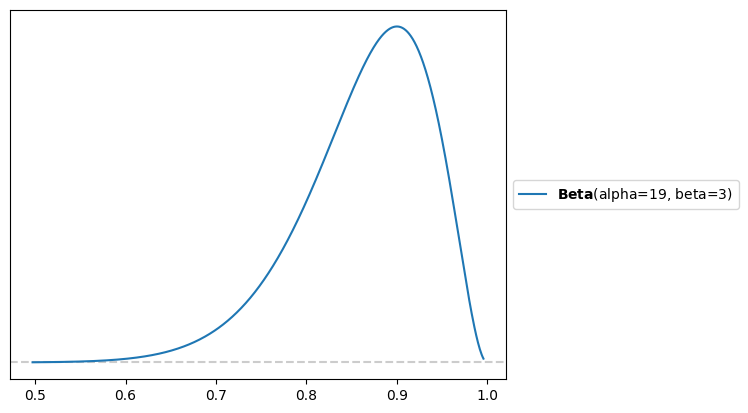

In [14]:
analytic_PKCR.plot_pdf()


In [15]:
import pymc as pm


In [23]:
#The makes and misses we have seen from Ronaldo
PKCR_data = np.repeat([1,0], repeats = [9,1])
PKCR_data


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [25]:
with pm.Model() as CR7_PKCR_model:

  θ = pm.Beta('θ' , alpha = 10. , beta = 2.)

  #we define our likelihood, which is how we process the free throws
  #This allow us to predict one penalty kick at a time later, among other things
  y = pm.Bernoulli('y', p = θ, observed = PKCR_data)

  idata_PKCR = pm.sample(1000)

<Axes: title={'center': 'θ'}>

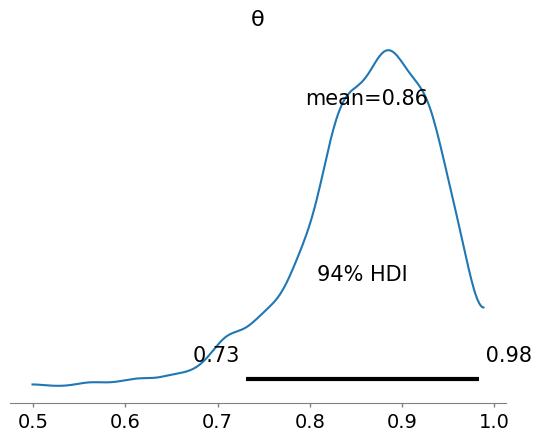

In [26]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_PKCR)

<Axes: >

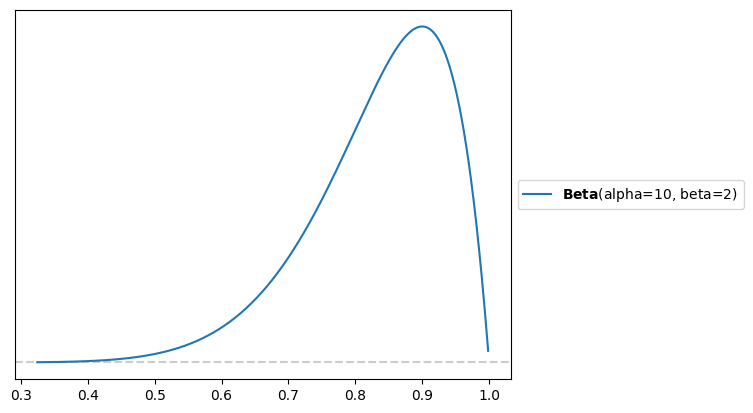

In [27]:
#probability density function (pdf) of the analytic solution
analytic_PKCR = pz.Beta(alpha = 10, beta = 2)
analytic_PKCR.plot_pdf()

<Axes: title={'center': 'θ'}>

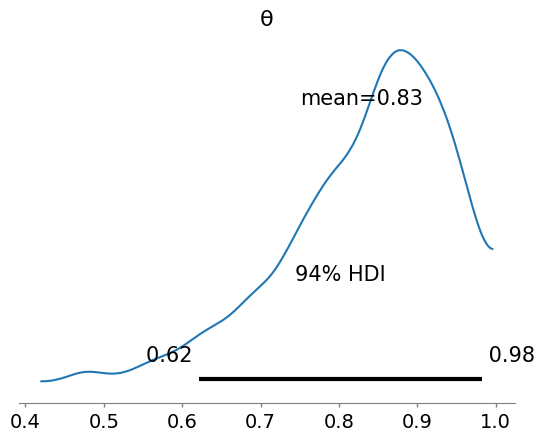

In [28]:
az.plot_posterior( {'θ' : analytic_PKCR.rvs(1000)} )

In [29]:
#The below function needs to know two things in order to make predictions:
#-the samples from the posterior; these are stored in idata_FT
#-the model that generated those samples, which we called wmby_FT_model
# The last input tells the function to store those predictions in idata_FT

pm.sample_posterior_predictive(idata_PKCR, model=CR7_PKCR_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [30]:
#Wemby's FTs in the 2023/2024 season, makes then misses
PKCR_data_2324 = np.repeat([1,0], repeats = [292,75])


In [32]:
with pm.Model() as CR7_PKCR_2324_model:
  #same prior from before based on my own prediction
  θ = pm.Beta('θ' , alpha = 10. , beta = 2.)

  y = pm.Bernoulli('y', p = θ, observed = PKCR_data_2324)

  idata_PKCR_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

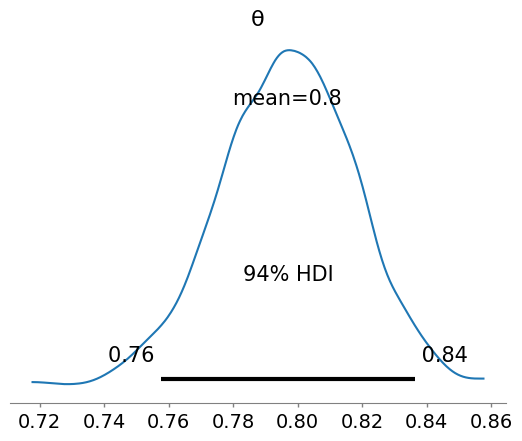

In [33]:
az.plot_posterior(idata_PKCR_2324)

In [34]:
#Generate the actual predictions for Ronaldo's next 2000 Penalty Kicks
pm.sample_posterior_predictive(idata_PKCR_2324, model=CR7_PKCR_2324_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

###**Conclusion**

In conclusion, Ronoldo's average Penalty Kick Conversion Rate will be around 80%. I personally think that Ronaldo will score around 90% of this penalties because he is a veteran and calm under pressure.